In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
#from pandas.compat import StringIO

sns.set(style="whitegrid")

In [5]:
df = sns.load_dataset("tips")

In [6]:
from IPython.display import display, clear_output

display(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

E_Ideal v.s. E_Premium: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.404e-30 U_stat=3.756e+06
I_Ideal v.s. I_Premium: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.627e-60 U_stat=1.009e+06
J_Ideal v.s. J_Premium: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.616e-36 U_stat=2.337e+05
E_Ideal v.s. E_Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.681e-18 U_stat=1.480e+06
I_Ideal v.s. I_Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.507e-12 U_stat=4.359e+05
J_Ideal v.s. J_Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.056e-04 U_stat=1.174e+05
E_Ideal v.s. E_Very Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.562e-01 U_stat

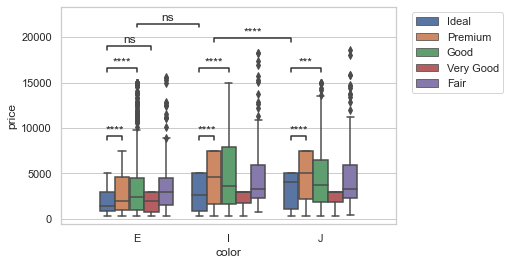

In [10]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue,)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')